# Introduction to Scikit-Learn (sklearn)
This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scrikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/alhorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Imrpove a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scrikit-Learn workflow

In [34]:
# 1. Get the data ready
import pandas as pd
import numpy as np

heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [36]:
import warnings

warnings.filterwarnings("default")

In [37]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

# 80% is for training, rest for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
import sklearn
sklearn.show_versions()


System:
    python: 3.13.9 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 19:11:29) [Clang 20.1.8 ]
executable: /Users/pnowak/Documents/Workspace/learnjs/libraries/machine learning/complete-machine-learning-bootcamp-udemy/9-scikit-learn/env/bin/python
   machine: macOS-15.6.1-arm64-arm-64bit-Mach-O

Python dependencies:
      sklearn: 1.7.2
          pip: 25.3
   setuptools: 80.9.0
        numpy: 2.3.5
        scipy: 1.16.3
       Cython: None
       pandas: 2.3.3
   matplotlib: 3.10.6
       joblib: 1.5.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libopenblas
       filepath: /Users/pnowak/Documents/Workspace/learnjs/libraries/machine learning/complete-machine-learning-bootcamp-udemy/9-scikit-learn/env/lib/libopenblasp-r0.3.30.dylib
        version: 0.3.30
threading_layer: pthreads
   architecture: neoversen1

       user_api: openmp
   internal_api: openmp
    num_threads

In [40]:
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [42]:
y_test

42     1
291    0
15     1
51     1
265    0
      ..
18     1
247    0
126    1
131    1
176    0
Name: target, Length: 61, dtype: int64

In [43]:
# 4. Evaluate the model on the training data and test data

clf.score(X_train, y_train)

1.0

In [44]:
clf.score(X_test, y_test)

0.7704918032786885

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71        21
           1       0.88      0.75      0.81        40

    accuracy                           0.77        61
   macro avg       0.76      0.78      0.76        61
weighted avg       0.80      0.77      0.78        61



In [46]:
confusion_matrix(y_test, y_preds)

array([[17,  4],
       [10, 30]])

In [47]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [48]:
# 5. Improve a model
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
  print(f"Tryihg model with {i} estimators")
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
  print("")

Tryihg model with 10 estimators
Model accuracy on test set: 80.33%

Tryihg model with 20 estimators
Model accuracy on test set: 80.33%

Tryihg model with 30 estimators
Model accuracy on test set: 78.69%

Tryihg model with 40 estimators
Model accuracy on test set: 78.69%

Tryihg model with 50 estimators
Model accuracy on test set: 77.05%

Tryihg model with 60 estimators
Model accuracy on test set: 77.05%

Tryihg model with 70 estimators
Model accuracy on test set: 80.33%

Tryihg model with 80 estimators
Model accuracy on test set: 81.97%

Tryihg model with 90 estimators
Model accuracy on test set: 80.33%



In [49]:
# t. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

/var/folders/mz/nsvqxb752bg5pmctkj35cx1c0000gn/T/ipykernel_3321/4292676906.py:4: ResourceWarning: unclosed file <_io.BufferedWriter name='random_forest_model_1.pk1'>
  pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))


In [50]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(X_test, y_test)

/var/folders/mz/nsvqxb752bg5pmctkj35cx1c0000gn/T/ipykernel_3321/3830364081.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='random_forest_model_1.pk1'>
  loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))


0.8032786885245902

## 1. Getting data ready to be used with machine learning

  1. split the data into features and labels (usually X and y)
  2. filling (also called imputing) or disregarding missing values
  3. converting non-numerical values to numerical values (also called feature encodeing)

In [51]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [54]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [55]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [57]:
len(X)

303

In [58]:
X.shape[0] * 0.8

242.4

### 1.1 Make sure it's all numerical

In [59]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [60]:
len(car_sales)

1000

In [61]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [62]:
# split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split in to training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [63]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor
# Regressor predict numbers

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers, as previous error was due to this problem, some columns were strings
# Each category value now becomes a column with 0 or 1 saying this value is set or not

# Now all data is only numerical, no strings anymore
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot", 
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [ ]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [ ]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
# Same but with pandas get dummies and booleans
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [ ]:
# Let's refit the model

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (imputation)
2. Remove the samples with missing data

In [ ]:
import pandas as pd
car_sales_missing: pd.DataFrame = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

X, y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White        35431.0    4.0
 1       BMW   Blue       192714.0    5.0
 2     Honda  White        84714.0    4.0
 3    Toyota  White       154365.0    4.0
 4    Nissan   Blue       181577.0    3.0
 ..      ...    ...            ...    ...
 995  Toyota  Black        35820.0    4.0
 996     NaN  White       155144.0    3.0
 997  Nissan   Blue        66604.0    4.0
 998   Honda  White       215883.0    4.0
 999  Toyota   Blue       248360.0    4.0
 
 [1000 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 1000, dtype: float64)

In [ ]:
# let's try and convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4000 stored elements and shape (1000, 16)>

In [ ]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: fill missing data with pandas

In [ ]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [ ]:
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

/var/folders/mz/nsvqxb752bg5pmctkj35cx1c0000gn/T/ipykernel_81721/2217192487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
/var/folders/mz/nsvqxb752bg5pmctkj35cx1c0000gn/T/ipykernel_81721/2217192487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [ ]:
# check again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [ ]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
len(car_sales_missing)

950

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

X, y

(        Make Colour  Odometer (KM)  Doors
 0      Honda  White        35431.0    4.0
 1        BMW   Blue       192714.0    5.0
 2      Honda  White        84714.0    4.0
 3     Toyota  White       154365.0    4.0
 4     Nissan   Blue       181577.0    3.0
 ..       ...    ...            ...    ...
 995   Toyota  Black        35820.0    4.0
 996  missing  White       155144.0    3.0
 997   Nissan   Blue        66604.0    4.0
 998    Honda  White       215883.0    4.0
 999   Toyota   Blue       248360.0    4.0
 
 [950 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 950, dtype: float64)

In [ ]:
# let's try and convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

### Option 2 - fill missing values with scikit-learn

In [ ]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [ ]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
# split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
X, y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White        35431.0    4.0
 1       BMW   Blue       192714.0    5.0
 2     Honda  White        84714.0    4.0
 3    Toyota  White       154365.0    4.0
 4    Nissan   Blue       181577.0    3.0
 ..      ...    ...            ...    ...
 995  Toyota  Black        35820.0    4.0
 996     NaN  White       155144.0    3.0
 997  Nissan   Blue        66604.0    4.0
 998   Honda  White       215883.0    4.0
 999  Toyota   Blue       248360.0    4.0
 
 [950 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 950, dtype: float64)

In [ ]:
# fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' & numerical values with mean

cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# create an imputer (sth that tills missing data)
imputer = ColumnTransformer([
  ('cat_imputer', cat_imputer, cat_features),
  ('door_imputer', door_imputer, door_feature),
  ('num_imputer', num_imputer, num_features),
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [ ]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [ ]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
# let's try and convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [ ]:
# now we got our data as numbers and filled (no missing values)
import numpy as np

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [ ]:
len(car_sales_filled), len(car_sales)

(950, 1000)

*Note* the 500 less values in transformed data is cause we dropped the 50 rows with missing values

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:

* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category (heart disease or not)
  * Sometimes you'see 'clf' (classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to sklearn machine learning map https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem

Let's use california housing dataset

In [ ]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [ ]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df.head()

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
# Import algorithm
## check first map https://scikit-learn.org/stable/machine_learning_map.html
from sklearn.linear_model import Ridge

# Setup random seed

np.random.seed(42)

#  Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

NameError: name 'train_test_split' is not defined

What if 'Ridge' didn't work or the score didn't fit our needs ?

Let's try different model..

How about to try an ensemble model (combination of smaller models to try predict better than single model)

https://scikit-learn.org/stable/machine_learning_map.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8059809073051385

## 2.2 Picking a machine learning model for a classification problem

In [ ]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


https://scikit-learn.org/stable/machine_learning_map.html

In [ ]:
len(heart_disease)

303

Consultint the map and it says to try 'LinearSVC'

In [ ]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8688524590163934

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* X = features, features variables, data
* y = labels, targets, target variables

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

# training, finding the patterns
clf.fit(X_train, y_train)

# use the patterns model has learnt
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 ways to make predictions

1. `predict()`
2. `predict_proba()`

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4])) # does not work, different shape/format than trained format

/Users/pnowak/Documents/Workspace/learnjs/libraries/machine learning/complete-machine-learning-bootcamp-udemy/9-scikit-learn/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
X_test.head() # has to be this shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# Compare predictions to tuth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [ ]:
# same as using built-in function
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()

In [ ]:
# predict_proba() returns probabilities of a classification label
# so in our case we predict heart disease 1 or not heart disease 0
# this means only two values possible, thus predict_proba() gives me 
# in each row probability for each case, [0.89, 0.11], tells that
# first row in X_test with 89% probability is not heart disease (0)
# and 11% probability its heart disease (1)
clf.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [ ]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


`predict()` can also be used for regression models

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to data
model.fit(X_train, y_train)

# Make predictions

y_preds = model.predict(X_test)

In [ ]:
y_preds[:10]

array([0.49058  , 0.75989  , 4.9350165, 2.55864  , 2.33461  , 1.6580801,
       2.34237  , 1.66708  , 2.5609601, 4.8519781])

In [ ]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
len(y_preds), len(y_test)

(4128, 4128)

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
# on average how those are different
mean_absolute_error(y_test, y_preds)

0.3270458119670544

In [ ]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimators built-in score() method
2. The scoring parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

# Fit clasifier to training data
clf.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Highest possible is 1.0, lowest 0.0
clf.score(X_train, y_train)

1.0

In [ ]:
# Score on data it has never seen
clf.score(X_test, y_test)

0.8688524590163934

lets use score on our regression problem

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor(n_estimators=10)

# Fit the model to data
model.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
model.score(X_test, y_test)

0.7851752292818259

In [ ]:
model.score(X_test, y_test)

0.7851752292818259

### 4.2 Evaluating a model using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance
clf = RandomForestClassifier(n_estimators=1000)

# Fit clasifier to training data
clf.fit(X_train, y_train);

In [ ]:
clf.score(X_test, y_test)

0.8688524590163934

In [ ]:
# makes 5 different splits for testing (cv=5)
# makes 5 different versions of training and test data
# to avoid lucky split, done just once
cross_val_score(clf, X, y, cv=5)

array([0.83606557, 0.90163934, 0.81967213, 0.8       , 0.78333333])

In [ ]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8688524590163934, np.float64(0.8215300546448088))

In [ ]:
# Scoring param set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [ ]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [ ]:
print(f'Heart disease classifier accuracy: {np.mean(cross_val_score * 100):.2f}%')

Heart disease classifier accuracy: 82.48%


## Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

ROC curves are comparison of a models true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model precits 0 when truth is 0
* False negative = model precits 0 when truth is 1

In [ ]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# make predictions with probabiblities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.11, 0.89],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [ ]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.13793103,
       0.13793103, 0.13793103, 0.20689655, 0.20689655, 0.20689655,
       0.27586207, 0.37931034, 0.37931034, 0.48275862, 0.48275862,
       0.55172414, 0.55172414, 0.5862069 , 0.65517241, 0.82758621,
       0.89655172, 1.        ])

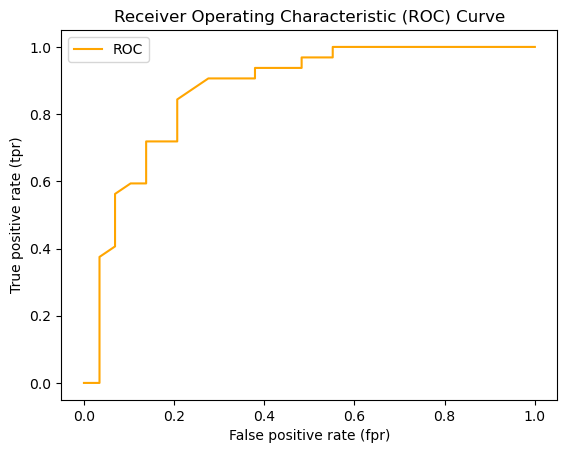

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr)
  and true positive rate (tpr) of a model
  """

  # Plot roc curve
  plt.plot(fpr, tpr, color="orange", label="ROC")

  # Plot line with no predictive power (baseline)

  # plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

  # Customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Receiver Operating Characteristic (ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8696120689655172

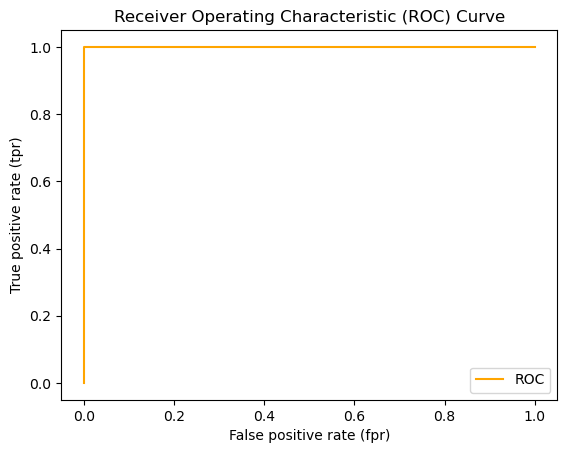

In [ ]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [ ]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

** Confusion Matrix **
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

IN essence, giving you and idea of where the model is getting confused

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [ ]:
# Visual confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Label'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

/Users/pnowak/Documents/Workspace/learnjs/libraries/machine learning/complete-machine-learning-bootcamp-udemy/9-scikit-learn/env/lib/python3.13/pty.py:95: DeprecationWarning: This process (pid=81721) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()
329647.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


2 channel Terms of Service accepted
Retrieving notices: done

EnvironmentLocationNotFound: Not a conda environment: /Users/pnowak/Documents/Workspace/learnjs/libraries/machine



<Axes: >

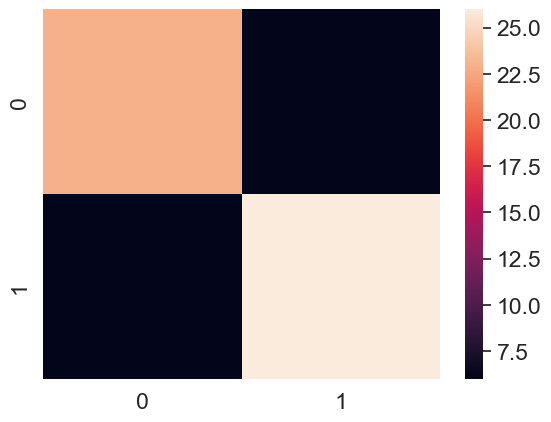

In [ ]:
# MAke our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)


sns.heatmap(conf_mat)

## Clasification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [ ]:
# Where precision adn recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only 1 positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/Users/pnowak/Documents/Workspace/learnjs/libraries/machine learning/complete-machine-learning-bootcamp-udemy/9-scikit-learn/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/pnowak/Documents/Workspace/learnjs/libraries/machine learning/complete-machine-learning-bootcamp-udemy/9-scikit-learn/env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/pnowak/Documents/Workspace/learnjs/libraries/machine learning/complete-machine-learning-bootcamp-udemy/9-scikit-lea

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

1. R^2 (r-squared, or coefficient of determination)
2. Mean absolute error (MAE)
3. Mean Squared error (MSE)

In [65]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

NameError: name 'housing_df' is not defined

In [64]:
model.score(X_test, y_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'